This is for HSR testing \\
the following is 

In [1]:
from ssqueezepy import ssq_cwt,wavs
from imp import reload
from obspy import UTCDateTime
from SeismTool.io import seism
from matplotlib import pyplot as plt
import numpy as np
from SeismTool.HSR import hsr
from SeismTool.mathTool.mathFunc_bak import Line
from scipy import signal
stations0 =  seism.StationList('hsrStd')
print(len(stations0))
#stations0 =  seism.StationList('../stations/XA.Loc.201908.txt1')
stations0.set('net','XA')
stations0.set('compBase','BH')
stations0.set('nameMode','RDDS')
#pL = [[stations0[1]['la'],stations0[1]['lo']],[stations0[-1]['la'],stations0[-1]['lo']]]
#line = Line(pL,H=1000)
#print(wavs())
ssq_cwt(np.arange(100),difftype = 'trig',get_w=True)

17
cpu
0
2


/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/ssqueezepy/ssqueezing.py:284: RuntimeWarning: overflow encountered in double_scalars
  b = fmax**(1/tmax) * (1/a)**(1/tmax)
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/ssqueezepy/ssqueezing.py:284: RuntimeWarning: invalid value encountered in double_scalars
  b = fmax**(1/tmax) * (1/a)**(1/tmax)


(array([[ -9.16357560e-04 -3.39706196e-03j,
           1.57854846e-03 +4.59781243e-03j,
          -2.33649765e-03 -5.51063335e-03j, ...,
           2.33640801e-03 -5.51067339e-03j,
          -1.57848303e-03 +4.59783897e-03j,
           9.16312914e-04 -3.39707802e-03j],
        [ -2.87454762e-03 -5.03034517e-03j,
           2.11789645e-03 +2.91056675e-03j,
          -2.34439340e-03 -2.00165110e-03j, ...,
           2.34433915e-03 -2.00167531e-03j,
          -2.11784407e-03 +2.91059073e-03j,
           2.87447218e-03 -5.03037265e-03j],
        [ -1.47350400e-03 -1.51040312e-03j,
           3.00908927e-03 +1.95600558e-03j,
          -1.38064718e-03 -4.33166919e-04j, ...,
           1.38062122e-03 -4.33178531e-04j,
          -3.00903781e-03 +1.95602397e-03j,
           1.47347804e-03 -1.51041104e-03j],
        ..., 
        [  0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j, ...,
           0.00000000e+00 +0.00000000e+

load data

In [2]:
T0=1.567129671405785799e+09
T0 =1.567174409828289032e+09
T0=1.567141351420457602e+09
NS=1
T3L0 = [seism.Trace3(seism.getTrace3ByFileName(station.\
    getFileNames(int(T0/86400)*86400),freq=[0.5, 40],delta0=0.01)) for station in stations0[:1]]

#####not too many noise std : 1549.317838#####
#####not too many noise std : 1339.262219#####
#####not too many noise std : 1139.771161#####


find the valid stations

In [3]:
T3L=[]
stations = seism.StationList()
for i in range(len(T3L0)):
    if len(T3L0[i])>0:
        T3L.append(T3L0[i])
        stations.append(stations0[i])


cut one waveform into one event slice

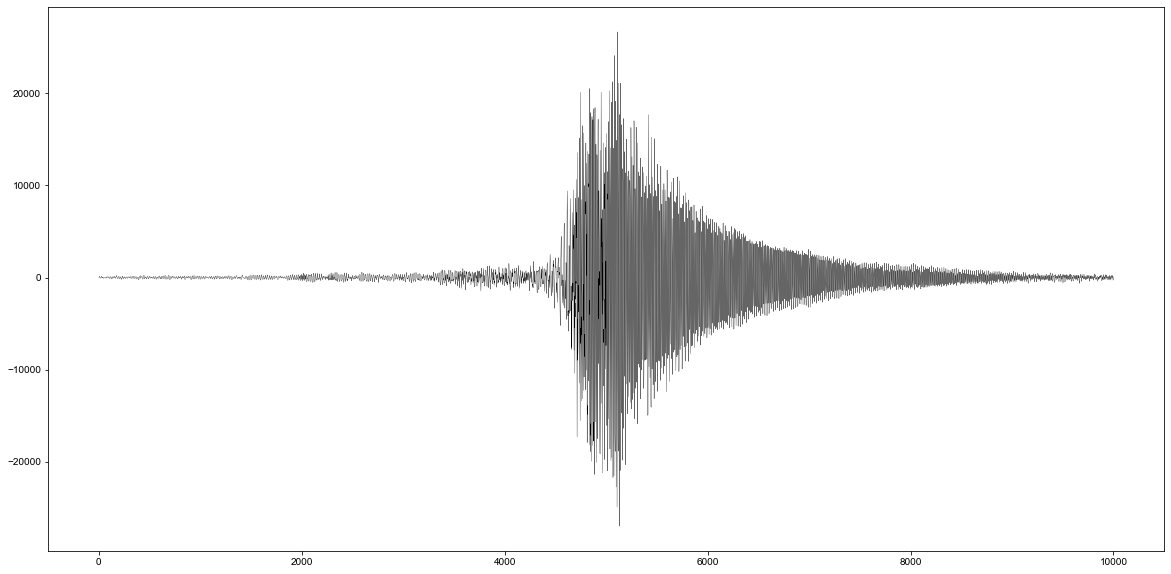

In [4]:
T0=1.567141733064932823e+09
t3 = T3L[0].slice(T0-50,T0+50).rotate(25)
plt.figure(figsize=[20,10])
plt.plot(t3.Data()[:,0],'k',linewidth=0.3)
plt.show()

do some ssq_cwt

In [5]:
import ssqueezepy
#reload(ssqueezepy.ssq_cwt)
Tx,Wx,ssq_freqs,scales,w=ssqueezepy.ssq_cwt(t3.Data(T0-30,T0+30)[:,0],fs=100,get_w=True,difftype='numeric')


In [6]:
fmax=20
print(t3.Delta(),Tx.shape,ssq_freqs[-1],len(ssq_freqs))
plt.figure(figsize=[10,5])
plt.pcolormesh(np.arange(Tx.shape[1])*t3.Delta(),ssq_freqs[:(ssq_freqs<fmax).sum()],np.abs(Tx[:(ssq_freqs<fmax).sum()]),rasterized=True)
plt.ylim([1/20,fmax])
plt.show()

0.010000000762939512 (269, 6001) 50.0 269


/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.
